<a href="https://colab.research.google.com/github/victor-soeiro/IntroPython-UERJ/blob/master/Projetos%5CProjeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 1 - Interação da radiação com a matéria através da equação de Bethe-Bloch**

---

**Autores:** Gabriela Gonçalves, Úrsula Goulart e Victor Soeiro.

**Última atualização:** 18.11.2020

[Arquivo do projeto](https://github.com/malbouis/Python_intro/blob/master/aulas/projetos/projetoIntrPython_PAE20201.pdf)

[Seminário de Princeton (Fall 2014)](http://physics.princeton.edu/~phy209/week2/index.html)


Para a realização desse projeto, utilizaremos os módulos Numpy e Matplotlib. Portanto, vamos importá-los.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

A estrutura de dados **list** não é como um vetor, portanto, não é possível utilizá-lo em operações matemáticas. Porém, o módulo numpy, já importado, contém uma estrutura de dados chamada **array** que nos permite isso. 

A partir desse fato, criaremos as funções do projeto de forma que os argumentos possam ser listas, arrays e números - inteiros e/ou decimais. Para encapsular essa verificação dos tipos de dados e correção dos mesmos, usaremos um decorador, que nos permite alterar o comportamento da função sem necessariamente alterá-la. Isso fará com que a parte de checagem do tipo do argumento seja encapsulado, facilitando a visualização do código e diminuindo a chance de erros.

Esse decorador, verificará qual o tipo de estrutura de dados do argumento. Caso seja uma lista, array, inteiro ou decimal, realizará as devidas modificações e checagens necessárias.

In [2]:
def check_argument(function):
    def wraper(arg):
        if isinstance(arg, list):
            return function(np.array(arg))
            
        if isinstance(arg, (int, float, np.ndarray)):
            return function(arg)

        raise ValueError(f"O tipo de argumento está incorreto. {arg} {type(arg)}")

    return wraper

Com o decorador criado, agora podemos executar com mais facilidade cada um dos passos do projeto.

## **Constantes**

As constantes usadas para o projeto encontram-se abaixo:

In [3]:
m_e = 0.5110  # Massa do elétron [MeV]
r_e = 2.818e-13  # Raio clássico do elétron [cm]
N_A = 6.022e23  # Número de avogadro [mol^-1]
I = 322e-6  # Energia média de excitação [Mev]
z = 1  # Carga da partícula incidente [adimensional]
Z = 29  # Número atômico [adimensional]
A = 63.546  # Massa atômica [g.mol^-1]
p = 8.960  # Densidade do meio [g.cm^-3]
K = 4 * np.pi * N_A * np.power(r_e, 2) * m_e  # MeV cm^2 mol^-1

## **Passo 1**

Escreva uma função em Python chamada **def gamma (beta)** que tenha como argumento $\beta$ e retorna $\gamma$. Teste-o para um valor de $\beta$, como por exemplo, 0,6.

---

In [4]:
@check_argument
def gamma(beta):
    return 1 / np.sqrt(1 - np.power(beta, 2))

Testando para um valor de 0,6:

In [5]:
gamma(0.6)

1.25

## **Passo 2**

Certifique-se de que sua função gama (beta) pode aceitar um vetor de $\beta$ e retornar um vetor compatível de $\gamma$.

---

Esse passo já é executado no momento em que se é utilizado o decorador e funções matemáticas do módulo numpy, permitindo também o uso de listas como argumento.

In [6]:
gamma([0.1, 0.2, 0.4, 0.6])

array([1.00503782, 1.02062073, 1.09108945, 1.25      ])

In [7]:
gamma(np.linspace(0.1, 0.9, 10))

array([1.00503782, 1.01833153, 1.04096688, 1.07486155, 1.12333379,
       1.1921837 , 1.29219148, 1.44579479, 1.70971707, 2.29415734])

## **Passo 3**

A partir de um vetor de valores $\beta$ variando de 0 a 0,995, faça um gráfico $\gamma$ versus $\beta$.

---

Para o gráfico, usaremos o módulo Matplotlib, que já está importado! 

A função matplotlib.pyplot.plot (importamos matplotlib.pyplot como plt) receberá duas arrays, uma para $\beta$ e outra para $\gamma$, fazendo assim o gráfico para o passo 3.

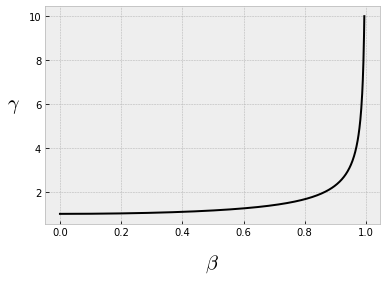

In [8]:
beta_values = np.linspace(0, 0.995, 1000)
gamma_values = gamma(beta_values)

plt.rcParams["axes.labelpad"] = 15
plt.rcParams["figure.figsize"] = [6, 4]

plt.xlabel(r"$\beta$", fontsize=20)
plt.ylabel(r"$\gamma$", rotation=0, fontsize=20)
plt.plot(beta_values, gamma_values, color="black")
plt.show()

## **Passo 4**

Faça um gráfico $\gamma \beta$ versus $\beta$. O que você observa?

---



Utilizando os mesmos valores de $\beta$ do passo anterior, o produto de $\gamma$ e $\beta$ será o produto das variáveis *beta_values* e *gamma_values*. Por efeito de comparação, o gráfico anterior se encontrará ao lado do gráfico do passo 4.

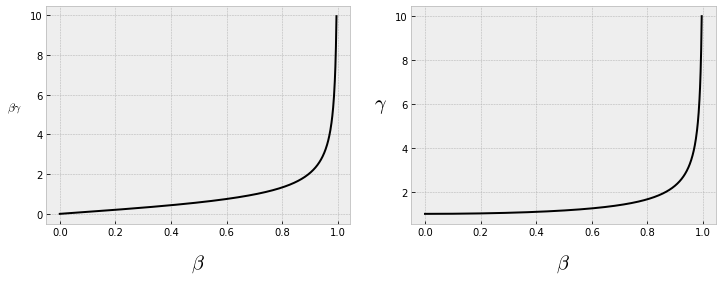

In [9]:
gamma_beta_values = beta_values * gamma_values

plt.rcParams["axes.labelpad"] = 15
plt.rcParams["figure.figsize"] = [12, 4]

plt.subplot(1, 2, 1)
plt.xlabel(r"$\beta$", fontsize=20)
plt.ylabel(r"$\beta \gamma$", rotation=0)
plt.plot(beta_values, gamma_beta_values, color="black")

plt.subplot(1, 2, 2)
plt.xlabel(r"$\beta$", fontsize=20)
plt.ylabel(r"$\gamma$", rotation=0, fontsize=20)
plt.plot(beta_values, gamma_values, color="black")

plt.show()

[ESCREVER O QUE OBSERVAMOS]

## **Passo 5**

Trace o argumento do log natural na equação de Bethe-Block em uma função de $\gamma \beta$. Faça o argumento ser uma nova função ln_argument(). Para você: essa função deve aceitar $\beta$ ou $\gamma$ como um argumento, ou ambos, ou seu produto? 

Observe que pode ser muito difícil obter $\beta$ com uma boa precisão a partir $\gamma$ em baixas velocidades; o oposto é difícil em velocidades muito altas. Faça o gráfico para um intervalo de 0,1 a 100.

---

Como vimos no passo anterior, quando $\beta$ aproxima-se de 1, o valor de $\gamma$ tende ao infinito. Logo, torna-se dificil utilizá-los como argumento, porém, o produto deles como argumento, nos ajuda por variar de zero ao infinito. 

Definindo a função **ln_argument(gamma_beta)**:

In [10]:
@check_argument
def ln_argument(gamma_beta):
    """
    Calcula o argumento do logaritmo natural da função de Bethe-Bloch.

    :param gamma_beta: O produto de gamma e beta.
    :returns: O argumento do logaritmo natural da função de Bethe-Bloch.
    """
    return 2 * m_e * np.power(gamma_beta, 2) / I

Agora, fazendo o gráfico para um intervalo de 0,1 a 100.

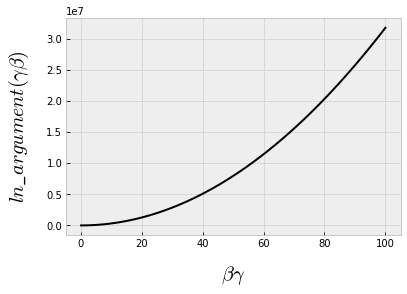

In [11]:
gamma_beta_values = np.linspace(0.1, 100, 100)
ln_argument_values = ln_argument(gamma_beta_values)

plt.rcParams["axes.labelpad"] = 15
plt.rcParams["figure.figsize"] = [6, 4]

plt.xlabel(r"$\beta \gamma$", fontsize=20)
plt.ylabel(r"$ln\_argument(\gamma \beta)$", fontsize=20)
plt.plot(gamma_beta_values, ln_argument_values, color="black")
plt.show()

## **Passo 6**

Esse gráfico não mostra a região de interessante para valores baixos de $\beta$. Faça o plot com uma escala logarítmica no eixo vertical?
Dica: Procure na ajuda do matplotlib a função semilogy(). Ficou melhor? Talvez ambos os eixos?

---

Iremos plotar o gráfico de três formas diferentes: escala logarítmica no eixo horizontal, no eixo vertical e em ambos os eixos. Para as escalas logarítmicas em apenas um eixo, o matplotlib nos fornece as funções **semilogx** e **semilogy**, já para ambos os eixos temos a função **loglog**. 

Plotando os gráficos,

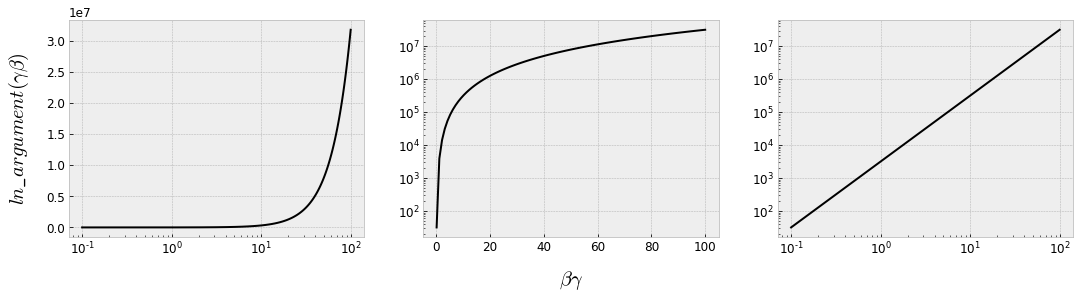

In [22]:
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelpad"] = 15
plt.rcParams["figure.figsize"] = [18, 4]

plt.subplot(1, 3, 1)
plt.ylabel(r"$ln\_argument(\gamma \beta)$", fontsize=20)
plt.semilogx(gamma_beta_values, ln_argument_values, color="black")

plt.subplot(1, 3, 2)
plt.xlabel(r"$\beta \gamma$", fontsize=20)
plt.semilogy(gamma_beta_values, ln_argument_values, color="black")

plt.subplot(1, 3, 3)
plt.loglog(gamma_beta_values, ln_argument_values, color="black")

plt.show()

## **Passo 7**

Provável que agora, seus valores $\gamma \beta$ não estão uniformemente espaçados no gráfico. Faça um vetor de valores $\gamma \beta$ que tenham um logaritmo uniformemente espaçado de 0,1 a 100. Repita o gráfico mais uma vez usando os novos argumentos. Uma identidade útil aqui é $\gamma^2 = {\gamma \beta}^2 + 1$

---

Vamos verificar o espaçamento do vetor **ln_argument(gamma_beta_values)**.

In [13]:
ln_argument_values[1] - ln_argument_values[0] == ln_argument_values[2] - ln_argument_values[1]

False

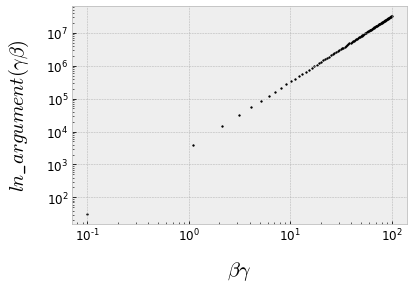

In [18]:
plt.rcParams["axes.labelpad"] = 15
plt.rcParams["figure.figsize"] = [6, 4]

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$\beta \gamma$", fontsize=20)
plt.ylabel(r"$ln\_argument(\gamma \beta)$", fontsize=20)
plt.scatter(gamma_beta_values, ln_argument_values, color="black", s=3)
plt.show()

Portanto, confirmamos que o espaçamento do argumento do logaritmo natural não é uniforme na escala logarítma. O módulo numpy contém uma função chamada logspace que retorna um vetor uniformemente espaçado. Essa função fará com que o espaçamento entre os valores de $\gamma \beta$ sejam iguais. 

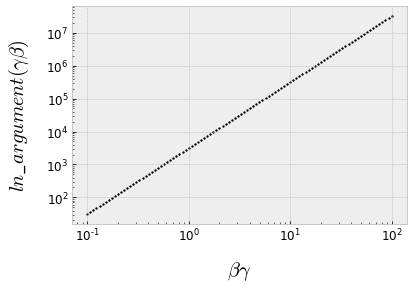

In [17]:
gamma_beta_logspace = np.logspace(np.log(0.1), np.log(100), 100, base=np.e)
ln_argument_logspace = ln_argument(gamma_beta_logspace)

plt.rcParams["axes.labelpad"] = 15
plt.rcParams["figure.figsize"] = [6, 4]

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$\beta \gamma$", fontsize=20)
plt.ylabel(r"$ln\_argument(\gamma \beta)$", fontsize=20)
plt.scatter(gamma_beta_logspace, ln_argument_logspace, color="black", s=3)
plt.show()

## **Passo 8**

Plote o conteúdo dos colchetes versus $\gamma \beta$ usando o mesmo espaçamento do vetor de log para o argumento x. Para termos números reais de I, escolha múons que penetram em um absorvedor de cobre. Esse é um número adimensional que pode variar de 3,55 a mais de 16.

---

Para calcular o conteúdo do colchetes, necessitamos saber o valor de $\beta$ a partir de $\gamma \beta$. Utilizando a identidade dada anteriormente, podemos criar uma função **beta(gamma_beta)** que nos retorna o valor de $\beta$ dado um valor de $\gamma \beta$.

In [20]:
@check_argument
def beta(gamma_beta):
    """
    Calcula o valor de beta dado o seu produto com gamma.

    :param gamma_beta: O produto de gamma e beta.
    :returns: Beta.
    """
    return gamma_beta / (np.sqrt(np.power(gamma_beta, 2) + 1))

Realizando um teste para $\gamma \beta = 0,75$, que deve nos retornar um $\beta$ valendo 0,6.

In [21]:
beta(0.75)

0.6

Com a função funcionando, agora, podemos criar uma função **brackets(gamma_beta)** que calcula o valor dos colchetes da equação.

In [23]:
@check_argument
def brackets(gamma_beta):
    """
    Calcula o valor dentro do colchetes da equação de Bethe-Bloch.

    :param gamma_beta: O produto de gamma e beta.
    :returns: Valor dentro do colchetes da equação de Bethe-Bloch.
    """
    return np.log(ln_argument(gamma_beta)) - np.power(beta(gamma_beta), 2)

Agora, fazendo o plot do gráfico do valor dos colchetes versus $\gamma \beta$.

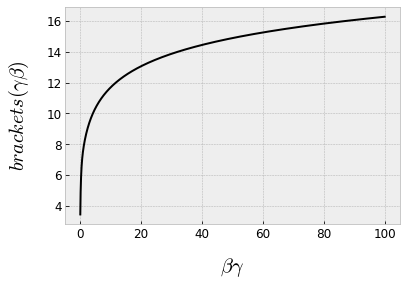

In [28]:
gamma_beta_logspace = np.logspace(np.log(0.1), np.log(100), 1000, base=np.e)
brackets_logspace = brackets(gamma_beta_logspace)

plt.rcParams["axes.labelpad"] = 15
plt.rcParams["figure.figsize"] = [6, 4]

plt.xlabel(r"$\beta \gamma$", fontsize=20)
plt.ylabel(r"$brackets(\gamma \beta)$", fontsize=20)
plt.plot(gamma_beta_logspace, brackets_logspace, color="black")
plt.show()

## **Passo 9**

Finalmente, plote toda a equação −(dE/dx), a energia perdida por unidade de distância,para múons que passam pelo cobre. Os dados de que você precisa sobre o cobre estão todos no PDG. Além disso, pode encontrar mais sobre o múon aqui. Convertendo para nossas unidades, a perda de energia deve ter uma largura mínima de 13 MeV / cm para o momento do múon ou energia em torno de 300 MeV.

---

Por fim, utilizando todas as outras funções criadas e a equação dada pelo arquivo, podemos criar uma função chamada **bethe_bloch(gamma_beta)** que nos retornará a perda de energia por unidade de distância.

In [30]:
def bethe_bloch(gamma_beta):
    """
    Calculo o valor da perda de energia por unidade de distância pela equação
    de Bethe-Bloch.

    :param gamma_beta: O produto de gamma e beta.
    :returns: A perda de energia por unidade de distância.
    """
    return K * np.power(z, 2) * p * (Z/A) * 1/np.power(beta(gamma_beta), 2) * brackets(gamma_beta)

Plotando o gráfico final de perda de energia (stopping power).

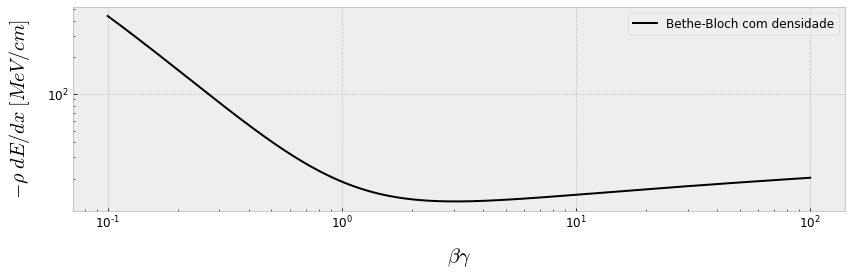

In [52]:
bethe_bloch_logspace = bethe_bloch(gamma_beta_logspace)

plt.rcParams["axes.labelpad"] = 15
plt.rcParams["figure.figsize"] = [12, 4]

plt.xlabel(r"$\beta \gamma$", fontsize=20)
plt.ylabel(r"$-\rho \; dE/dx \; [MeV / cm]$", fontsize=20)
plt.loglog(gamma_beta_logspace, bethe_bloch_logspace, 
           label="Bethe-Bloch com densidade", color="black")
plt.legend()
plt.tight_layout()
plt.show()